In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **[RP SPRING 23] Data Cleaning, Preprocessing & EDA** 

## Table of Contents
1. Dataset
2. Data Cleaning: Data Types & Null Values
3. EDA: Preprocessing, Correlation Heatmaps & Other Visualizations

**Datasets:** 

- [Merged datasets] Listings & Reviews of AirBnB's in San Francisco

### 1) Dataset - Airbnb Listings and Reviews

In [2]:
#load in datasets
listings = pd.read_csv('listings.csv.gz')
reviews = pd.read_csv('reviews.csv.gz',engine='python',encoding = 'utf-8',error_bad_lines=False)

#merge data
joined = pd.merge(listings, reviews, how='inner', left_on='id', right_on='listing_id')
joined.head()

,id_x,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


### 2) Data Cleaning: Data Types & Null Values
- In order to familiarize with the dataset, it may be helpful to understand the datatypes and null counts of each column

In [3]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316517 entries, 0 to 316516
Data columns (total 80 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id_x                                          316517 non-null  int64  
 1   listing_url                                   316517 non-null  object 
 2   scrape_id                                     316517 non-null  int64  
 3   last_scraped                                  316517 non-null  object 
 4   name                                          316517 non-null  object 
 5   description                                   316497 non-null  object 
 6   neighborhood_overview                         273818 non-null  object 
 7   picture_url                                   316517 non-null  object 
 8   host_id                                       316517 non-null  int64  
 9   host_url                                      31

**Notice that `neighbourhood_group_cleansed`, `bathrooms`, and `calendar_updated` have no non-null entries. You may want to remove those columns since they are not useful for data analysis.**

In [4]:
#drop columns that have no non-null entries
df_dropped = joined.drop(columns = ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'])
df_dropped.head()

,id_x,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,https://www.airbnb.com/rooms/958,20201005145812,2020-10-05,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,1,0,0,1.92,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


**As for data types, you may have noticed the `price` column is `str`. If you wanted to use `price` in any of your calculations, be sure to convert the values to type `float`.**

In [5]:
#Values under 'price' column are str
df_dropped['price'].values

array(['$131.00', '$131.00', '$131.00', ..., '$249.00', '$75.00',
       '$75.00'], dtype=object)

In [6]:
#Remove '$' and ',' from each 'price' entry
df_dropped['price'] = df_dropped['price'].replace({'\$':'', '\,':''}, regex = True)
df_dropped['price'].values

array(['131.00', '131.00', '131.00', ..., '249.00', '75.00', '75.00'],
      dtype=object)

In [7]:
#Convert price to float
df_dropped['price'] = pd.to_numeric(df_dropped['price'])
df_dropped['price'].values

array([131., 131., 131., ..., 249.,  75.,  75.])

**For simplicity, let's assume we want to understand how `price` is affected by `number of nights stayed`, `reviews`, `furniture` and `room type`. Filter the DataFrame for those specific features.**

In [8]:
df_new = df_dropped[['minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_cleanliness', 
                     'review_scores_communication', 'room_type', 'beds', 'bedrooms', 'accommodates', 'price']]
df_new.head()

,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type,beds,bedrooms,accommodates,price
0,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
1,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
2,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
3,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
4,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0


In [9]:
#check dtypes
df_new.dtypes

minimum_nights                   int64
maximum_nights                   int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
beds                           float64
bedrooms                       float64
accommodates                     int64
price                          float64
dtype: object

In [10]:
#check null values
df_new.isna().sum()

minimum_nights                     0
maximum_nights                     0
review_scores_rating              51
review_scores_cleanliness       3398
review_scores_communication     3397
room_type                          0
beds                              28
bedrooms                       24116
accommodates                       0
price                              0
dtype: int64

**Since there are many missing values and we don't want to lose data, we can replace missing values with the median. Note that this will reduce outliers but will increase bias.**

In [11]:
df_new.fillna(df_new.median())

,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type,beds,bedrooms,accommodates,price
0,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
1,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
2,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
3,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
4,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
...,...,...,...,...,...,...,...,...,...,...
316512,2,29,100.0,10.0,10.0,Private room,2.0,1.0,2,35.0
316513,2,29,100.0,10.0,10.0,Private room,2.0,1.0,2,35.0
316514,2,28,100.0,10.0,10.0,Entire home/apt,3.0,3.0,6,249.0
316515,1,1125,100.0,10.0,10.0,Private room,1.0,1.0,2,75.0


### 3) EDA: Correlation Heatmaps & Other Visualizations
- EDA helps you understand the data without making presumptions.

In [12]:
#Describe data
df_new.describe()

,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,review_scores_communication,beds,bedrooms,accommodates,price
count,3.165170e+05,3.165170e+05,316466.000000,313119.000000,313120.000000,316489.000000,292401.000000,316517.000000,316517.000000
mean,2.535579e+03,2.867180e+03,96.046204,9.733162,9.914279,1.670020,1.302427,2.963174,159.878984
std,5.027379e+05,5.027365e+05,3.672261,0.504982,0.307566,1.216876,0.669576,1.662169,211.993849
min,1.000000e+00,1.000000e+00,20.000000,2.000000,2.000000,0.000000,1.000000,1.000000,10.000000
25%,1.000000e+00,2.800000e+01,95.000000,10.000000,10.000000,1.000000,1.000000,2.000000,89.000000
50%,2.000000e+00,3.000000e+01,97.000000,10.000000,10.000000,1.000000,1.000000,2.000000,125.000000
75%,4.000000e+00,1.124000e+03,98.000000,10.000000,10.000000,2.000000,1.000000,4.000000,175.000000
max,1.000000e+08,1.000000e+08,100.000000,10.000000,10.000000,14.000000,8.000000,16.000000,25000.000000


**Generate Correlation Heatmap for Numerical Features**

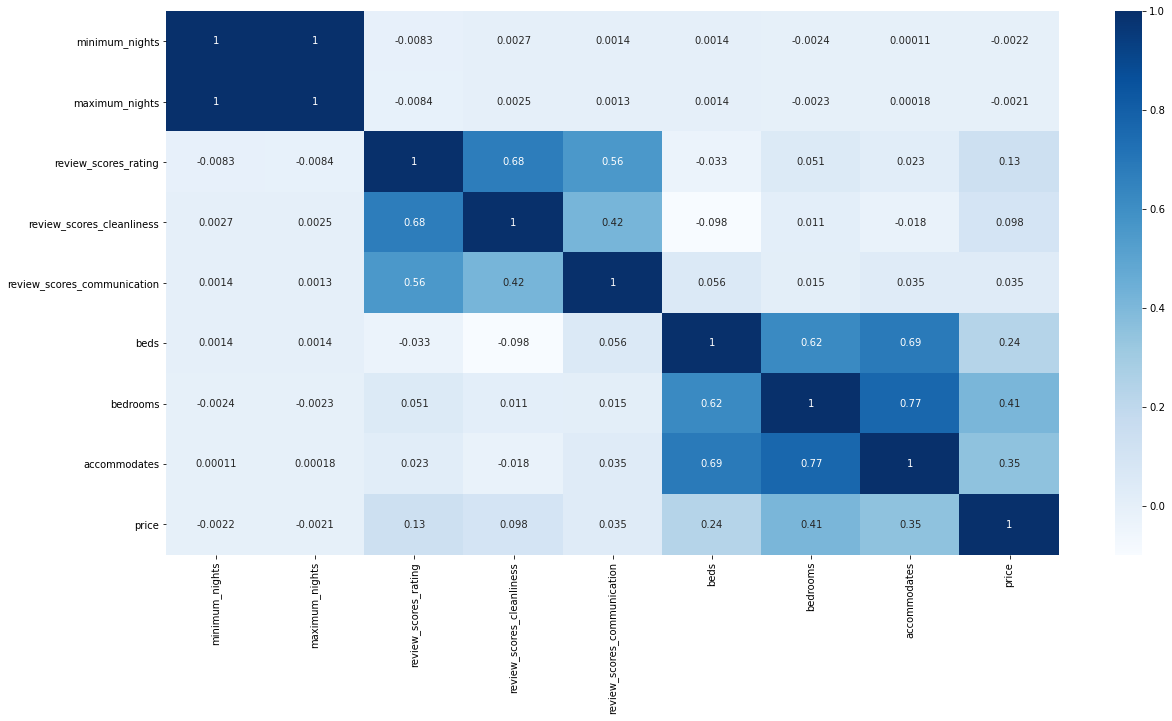

In [13]:
#creating correlation matrix: numerical values
plt.figure(figsize=(20,10))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

**Preprocess (One-Hot-Encode) Categorical Features for Correlation Heatmap**

In [14]:
#categorical feature 'room_type'
categorical = df_new[['room_type', 'price']]
categorical

,room_type,price
0,Entire home/apt,131.0
1,Entire home/apt,131.0
2,Entire home/apt,131.0
3,Entire home/apt,131.0
4,Entire home/apt,131.0
...,...,...
316512,Private room,35.0
316513,Private room,35.0
316514,Entire home/apt,249.0
316515,Private room,75.0


In [15]:
#value counts for different entries
categorical.room_type.value_counts()

Entire home/apt    166267
Private room       138849
Shared room          8694
Hotel room           2707
Name: room_type, dtype: int64

In [16]:
#create dummy variables for one-hot-encoding
one_hot_room_type = pd.get_dummies(categorical.room_type)
categorical2 = categorical.join(one_hot_room_type)
categorical2
categorical2_dropped = categorical2.drop(columns=['room_type'])
categorical2_dropped

,price,Entire home/apt,Hotel room,Private room,Shared room
0,131.0,1,0,0,0
1,131.0,1,0,0,0
2,131.0,1,0,0,0
3,131.0,1,0,0,0
4,131.0,1,0,0,0
...,...,...,...,...,...
316512,35.0,0,0,1,0
316513,35.0,0,0,1,0
316514,249.0,1,0,0,0
316515,75.0,0,0,1,0


**Generate Correlation Heatmap for Categorical Features**

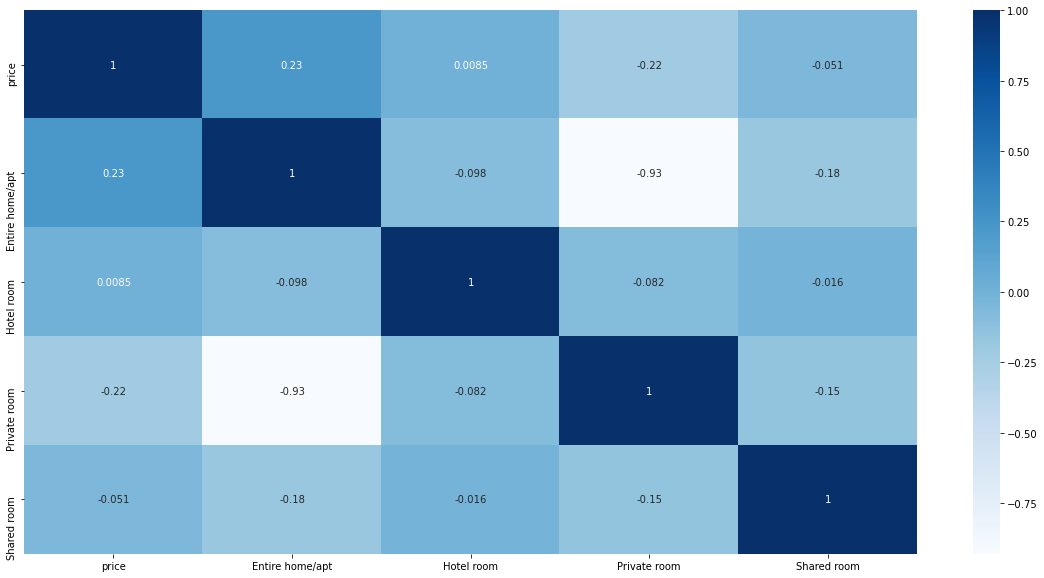

In [17]:
#creating correlation matrix: numerical values
plt.figure(figsize=(20,10))
cor2 = categorical2_dropped.corr()

sns.heatmap(cor2, annot=True, cmap=plt.cm.Blues)
plt.show()

**Other Visualizations for EDA**

In [18]:
df_new.head()

,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type,beds,bedrooms,accommodates,price
0,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
1,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
2,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
3,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0
4,2,30,97.0,10.0,10.0,Entire home/apt,2.0,1.0,3,131.0


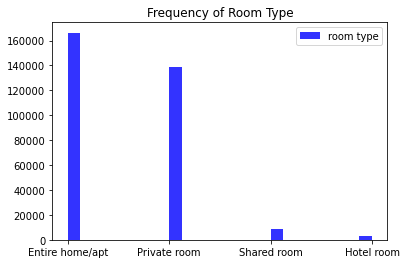

In [19]:
plt.hist(df_new['room_type'], bins = 24, color='b', label='room type',alpha=0.8)
plt.title('Frequency of Room Type')
plt.legend(loc='upper right')
plt.show()

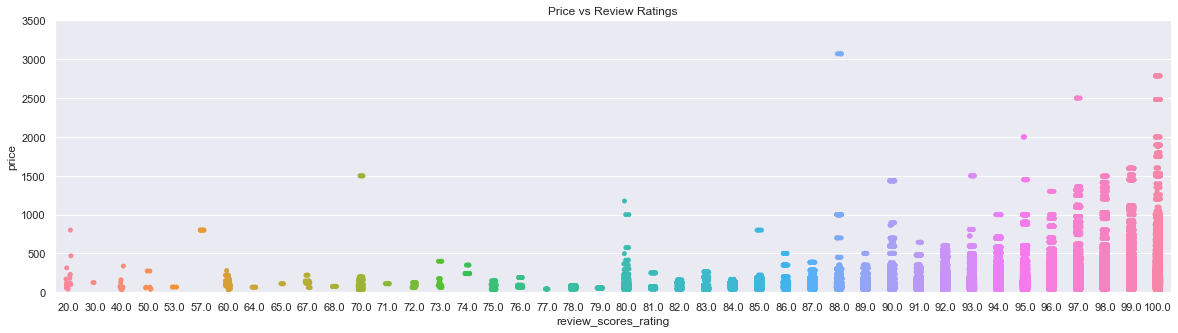

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
review_vs_price = sns.stripplot(x='review_scores_rating', y='price', data = df_new, jitter=True)
review_vs_price.set(ylim=(0, 3500))
plt.title('Price vs Review Ratings')
plt.show()

#### Transforming Data

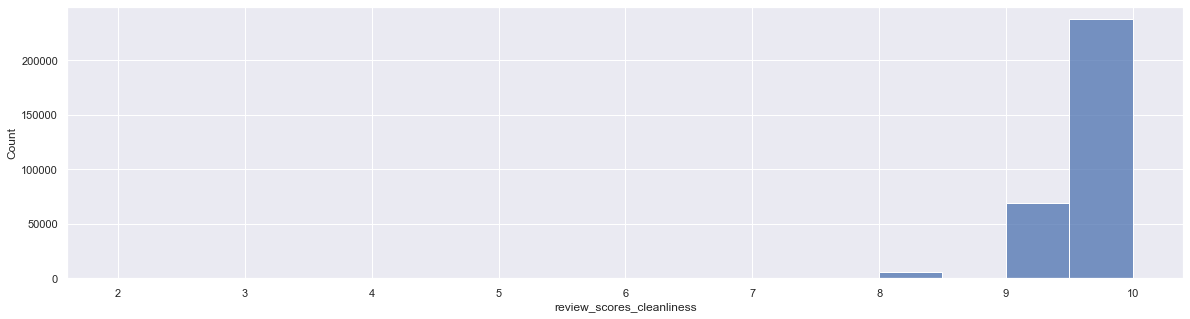

In [21]:
sns.histplot(data = df_new, x = "review_scores_cleanliness", binwidth=0.5);

In [22]:
np.min(df_new["review_scores_cleanliness"])

2.0

#### There's a clear left skew in the distribution of review scores. Let's apply a power 2 transformation to the data and see what happens!

<ipython-input-23-558623f41f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["review_scores_transformed"] = np.power(df_new["review_scores_cleanliness"], 2)


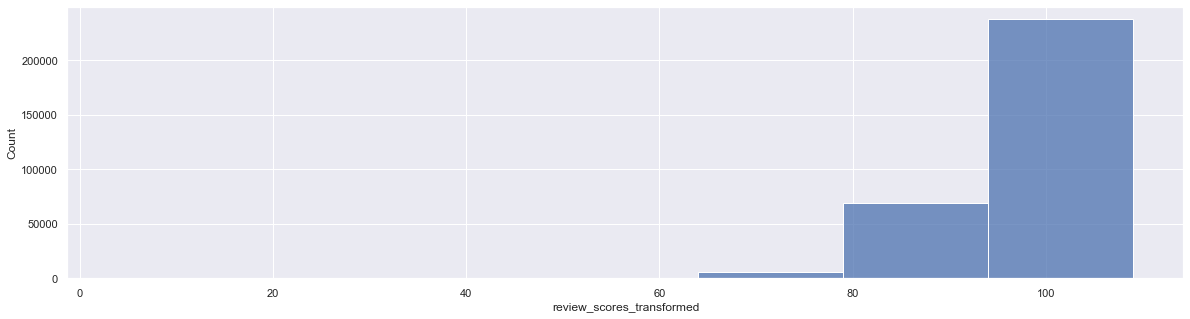

In [23]:
df_new["review_scores_transformed"] = np.power(df_new["review_scores_cleanliness"], 2)
sns.histplot(data = df_new, x = "review_scores_transformed", binwidth=15);

In [24]:
np.max(df_new["review_scores_transformed"])

100.0

#### There is still a heavy left skew in the data. Let's see if the correlation improved

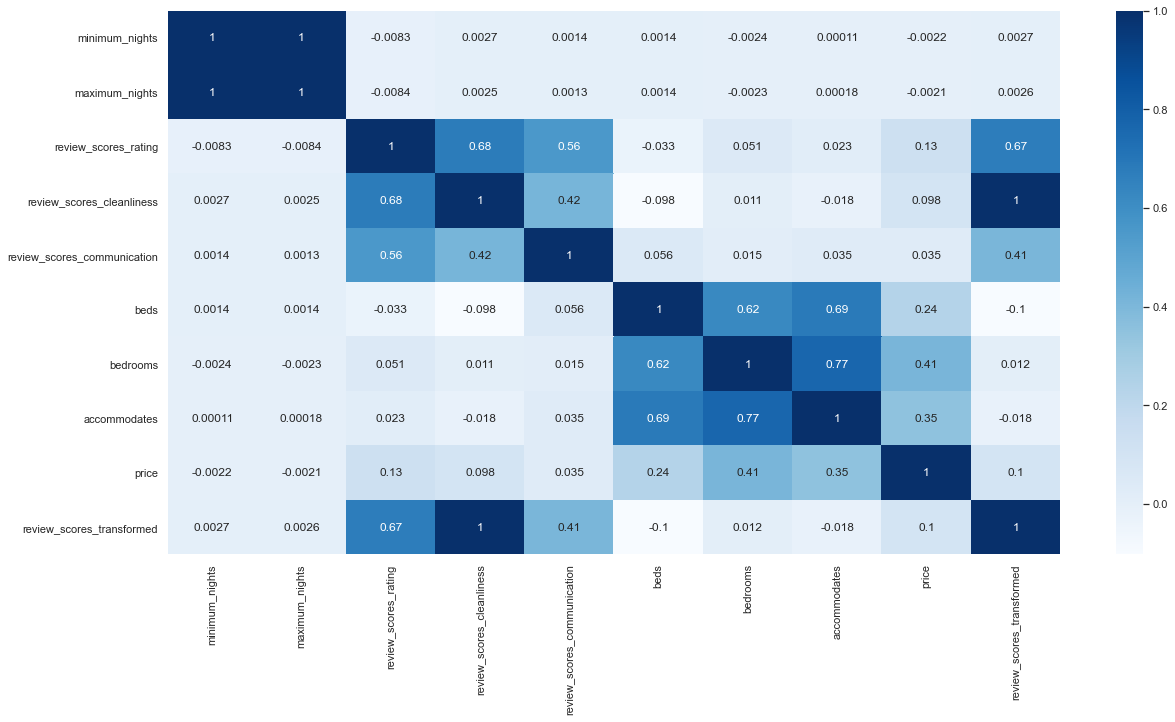

In [25]:
plt.figure(figsize=(20,10))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

#### It's small but there is a jump in the correlation from 0.098 to 0.1. This is because the data was so ridiculously skewed to begin with (potential bias?)

### PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca = df_new.loc[:, ["price", "review_scores_rating", "beds", "bedrooms", "accommodates", "review_scores_transformed"]].dropna(axis=0)
df_pca

,price,review_scores_rating,beds,bedrooms,accommodates,review_scores_transformed
0,131.0,97.0,2.0,1.0,3,100.0
1,131.0,97.0,2.0,1.0,3,100.0
2,131.0,97.0,2.0,1.0,3,100.0
3,131.0,97.0,2.0,1.0,3,100.0
4,131.0,97.0,2.0,1.0,3,100.0
...,...,...,...,...,...,...
316512,35.0,100.0,2.0,1.0,2,100.0
316513,35.0,100.0,2.0,1.0,2,100.0
316514,249.0,100.0,3.0,3.0,6,100.0
316515,75.0,100.0,1.0,1.0,2,100.0


In [27]:
# Scale data before applying PCA
scaling = StandardScaler()
 
# Use fit and transform method
scaling.fit(df_pca)
scaled_data = scaling.transform(df_pca)

# Set the n_components
principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(288989, 3)


In [28]:
pd.DataFrame(principal.components_)

,0,1,2,3,4,5
0,0.345597,0.039150,0.506382,0.555184,0.560694,-0.000126
1,-0.162459,-0.689912,0.124146,-0.004101,0.040092,-0.693247
2,0.898136,-0.144529,-0.345263,-0.056319,-0.175941,-0.138310


In [29]:
pd.DataFrame(x)

,0,1,2
0,-0.161580,-0.509639,-0.294743
1,-0.161580,-0.509639,-0.294743
2,-0.161580,-0.509639,-0.294743
3,-0.161580,-0.509639,-0.294743
4,-0.161580,-0.509639,-0.294743
...,...,...,...
288984,-0.609412,-1.031911,-0.703049
288985,-0.609412,-1.031911,-0.703049
288986,3.111209,-1.008794,-0.686864
288987,-0.951967,-1.160876,-0.263161


Text(0.5, 0, 'PC3')

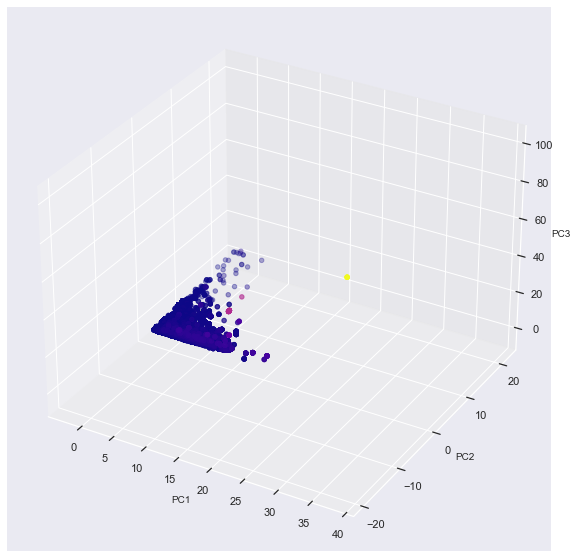

In [30]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0], x[:,1], x[:,2], c = df_pca['price'], cmap = 'plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [31]:
print(principal.explained_variance_ratio_) # about 85% of the variance is captured by the first 3 principal components

[0.43327941 0.28638667 0.12959555]
